In [5]:
from sklearn.model_selection import GridSearchCV   #그리드 서치
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv')

train, test = train_test_split(df, test_size=0.2)

In [9]:
def svc_param_selection(X, y, nfolds):
    svm_parameters = [
                        {'kernel': ['rbf'],
                         'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
                         'C': [0.01, 0.1, 1, 10, 100, 1000]
                        }
                       ]
    
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X_train, y_train.values.ravel())
    print(clf.best_params_)
    
    return clf

In [14]:
X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


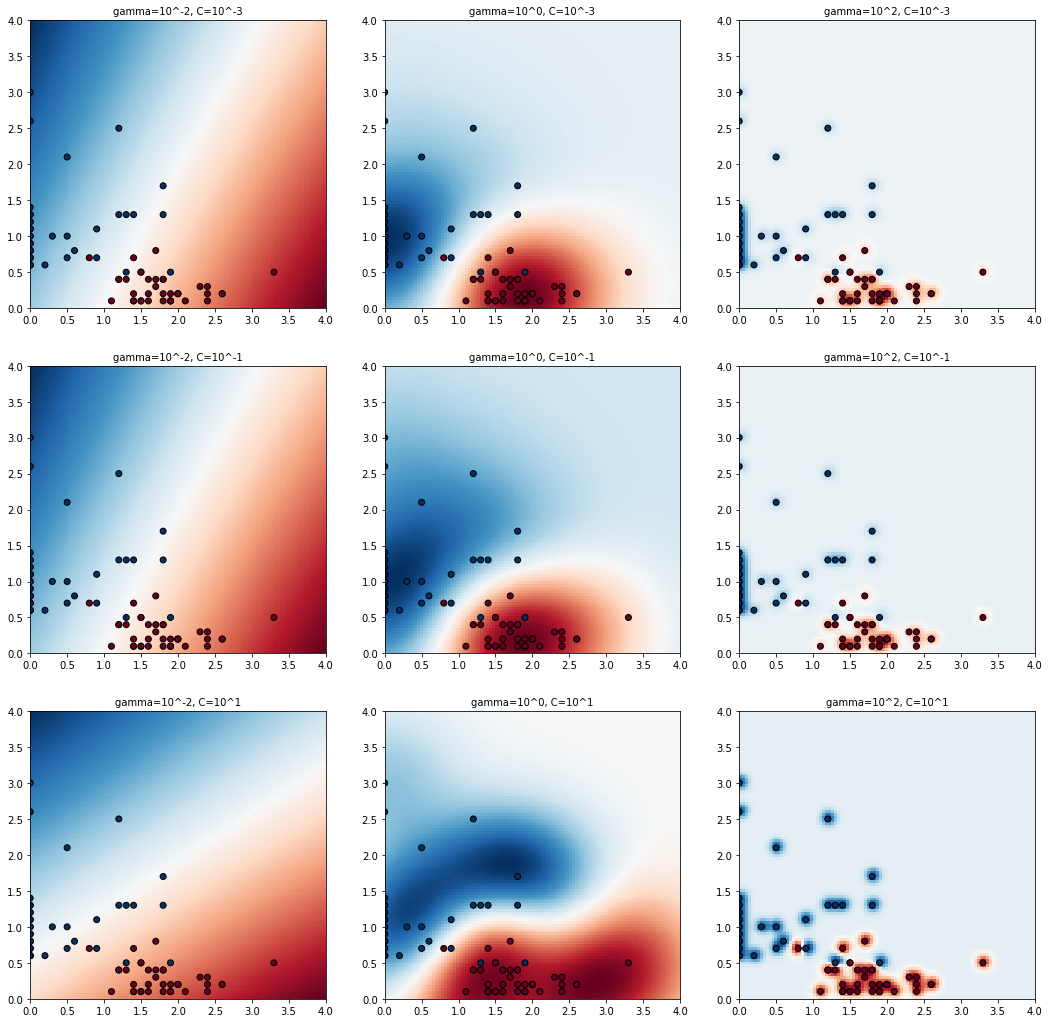

In [11]:
# 시각화
C_canditates = []
C_canditates.append(clf.best_params_['C'] * 0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C'] * 100)

gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)

X = train[['3P', 'BLK']]
Y = train['Pos'].tolist()

# 문자열 SG와 C를 벡터화
position = []
for gt in Y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

classifiers = []
for C in C_canditates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))

plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(len(C_canditates), len(gamma_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')

In [12]:
# 테스트에 사용될 특징과 예측값을 지정
X_test = test[['3P', 'BLK']]

y_test = test[['Pos']]

y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : "+ str(accuracy_score(y_true, y_pred)) )

              precision    recall  f1-score   support

           C       0.78      1.00      0.88         7
          SG       1.00      0.85      0.92        13

    accuracy                           0.90        20
   macro avg       0.89      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20


accuracy : 0.9


In [13]:
comparison = pd.DataFrame({'prediction':y_pred, 'ground_truth':y_true.values.ravel()}) 
comparison

,prediction,ground_truth
0,SG,SG
1,SG,SG
2,C,C
3,SG,SG
4,SG,SG
5,C,C
6,C,SG
7,C,C
8,SG,SG
9,SG,SG
